In [ ]:
import yfinance as yf

# Define stock symbol and date range
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')

# Save dataset to CSV file
data.to_csv("AAPL_stock_data.csv")

print("Dataset saved as AAPL_stock_data.csv")
print(data.info())
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Dataset saved as AAPL_stock_data.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3774 non-null   float64
 1   (High, AAPL)    3774 non-null   float64
 2   (Low, AAPL)     3774 non-null   float64
 3   (Open, AAPL)    3774 non-null   float64
 4   (Volume, AAPL)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455077  6.391279  6.422877  493729600
2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800
2010-01-06  6.348846  6.477045  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200
2010-01-08  6.379241  6.379844  6

[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  3774 non-null   float64
dtypes: float64(1)
memory usage: 59.0 KB
None
Price          Close
Ticker          AAPL
Date                
2010-01-04  6.440332
2010-01-05  6.451466
2010-01-06  6.348846
2010-01-07  6.337109
2010-01-08  6.379242
Mean Squared Error (MSE): 9.09177104528148
R² Score (Accuracy): 98.97%


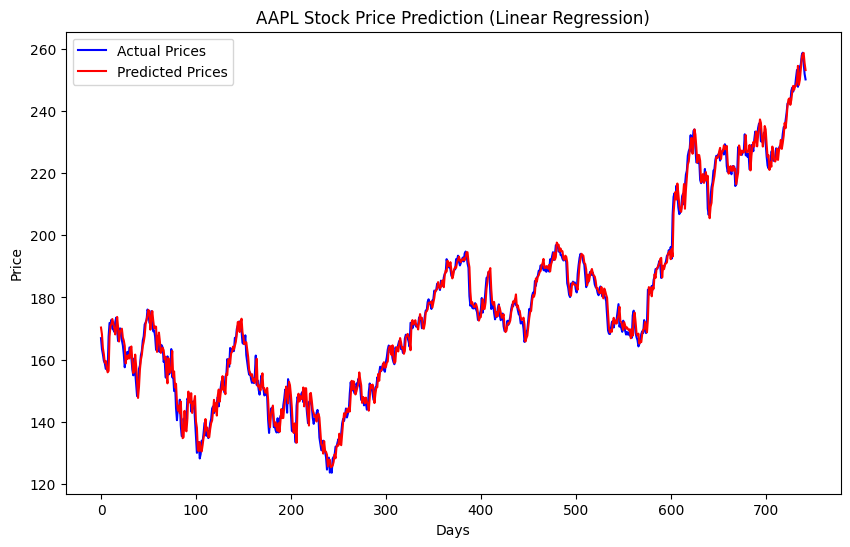

In [ ]:
#Linear Regraastion
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download Historical Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')
data = data[['Close']]  # Using closing price
print(data.info())
print(data.head())

# Step 2: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60  # Using 60 days of historical data
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Evaluate Model Performance
mse = mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score (Accuracy): {r2 * 100:.2f}%')

# Step 7: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction (Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    3774 non-null   float64
 1   (High, AAPL)    3774 non-null   float64
 2   (Low, AAPL)     3774 non-null   float64
 3   (Close, AAPL)   3774 non-null   float64
 4   (Volume, AAPL)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0136 - val_loss: 0.0067
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4944e-04 - val_loss: 0.0019
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0996e-05 - val_loss: 0.0012
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4459e-05 - val_loss: 8.6772e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4371e-05 - val_loss: 8.1549e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5

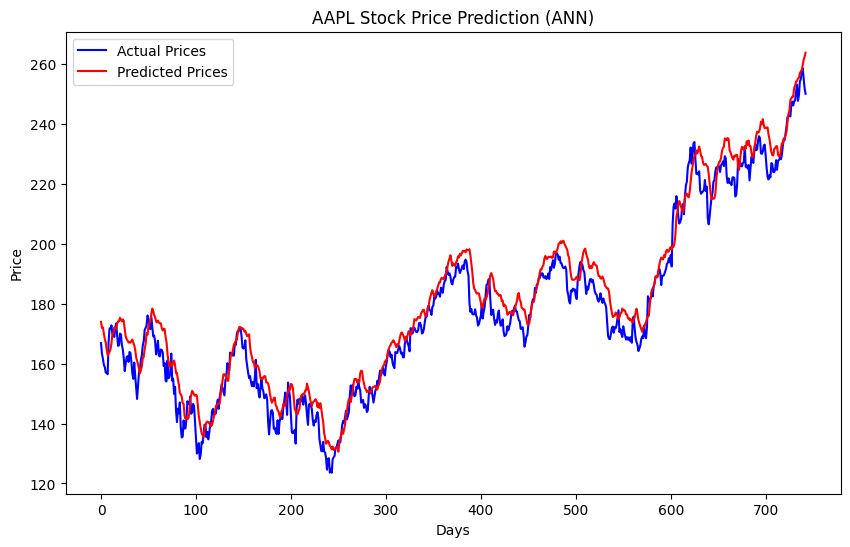

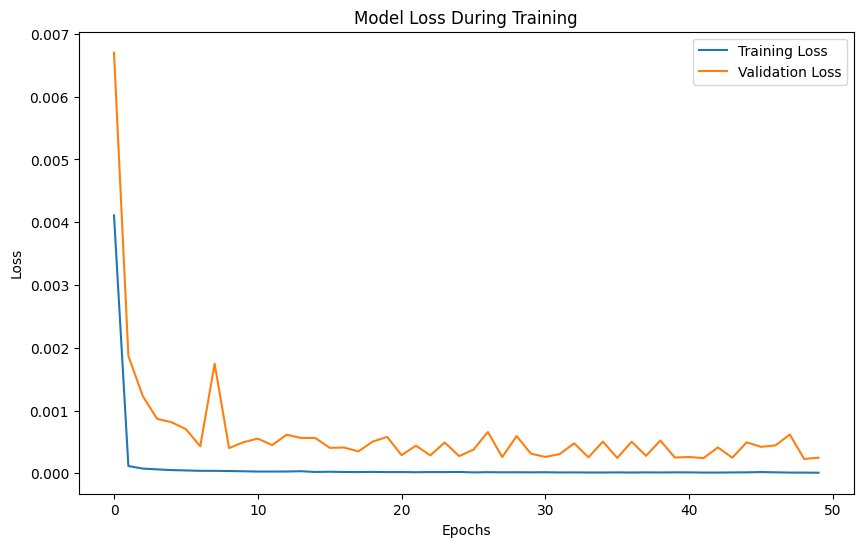

In [ ]:
#ANN Model
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Download Historical Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using multiple features

# Display data info
print(data.info())

# Step 2: Data Preprocessing
# Separate scaler for Close price
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(data[['Close']])  # Only for Close

# Scale all data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60  # Using 60 days of historical data
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    # Using multiple features for the past 60 days
    X.append(scaled_data[i-sequence_length:i])
    # Predicting the next day's closing price
    y.append(scaled_close[i, 0])  # Close is the target
X, y = np.array(X), np.array(y)

# Flatten input for ANN
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])  # Flattening

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build and Train ANN Model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Output layer for regression

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Step 5: Make Predictions
predictions = model.predict(X_test)
# Inverse transform using the close_scaler
predictions = close_scaler.inverse_transform(predictions)
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Evaluate Model Performance
mse = mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score (Accuracy): {r2 * 100:.2f}%')

# Step 7: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction (ANN)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 8: Plot Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    3774 non-null   float64
 1   (High, AAPL)    3774 non-null   float64
 2   (Low, AAPL)     3774 non-null   float64
 3   (Close, AAPL)   3774 non-null   float64
 4   (Volume, AAPL)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None
Mean Squared Error (MSE): 705.9417722406496
R² Score (Accuracy): 20.40%


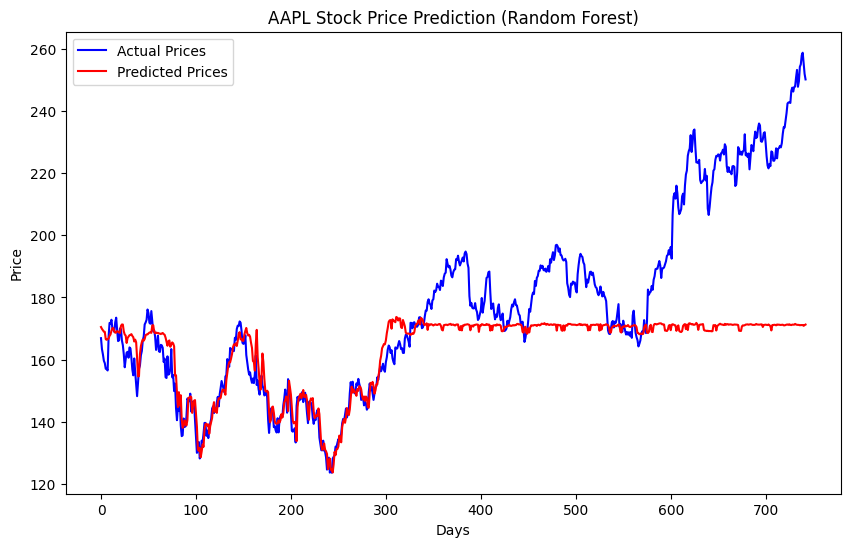

In [ ]:
#RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download Historical Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Display data info
print(data.info())

# Step 2: Data Preprocessing
# Separate scaler for Close price
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(data[['Close']])

# Scale all data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i].flatten())  # Flatten input
    y.append(scaled_close[i, 0])
X, y = np.array(X), np.array(y)

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build and Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = rf_model.predict(X_test)
predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Evaluate Model Performance
mse = mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score (Accuracy): {r2 * 100:.2f}%')

# Step 7: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction (Random Forest)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.0082
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 1.3717e-04
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 8.0640e-05
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 8.7843e-05
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 8.1859e-05
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 8.1046e-05
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 7.9037e-05
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 7.6288e-05
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 7.4354e-05
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 6.8726e-05
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Mean Squared Error (MSE): 45.52339115035943
R² Score (Accuracy): 94.87%


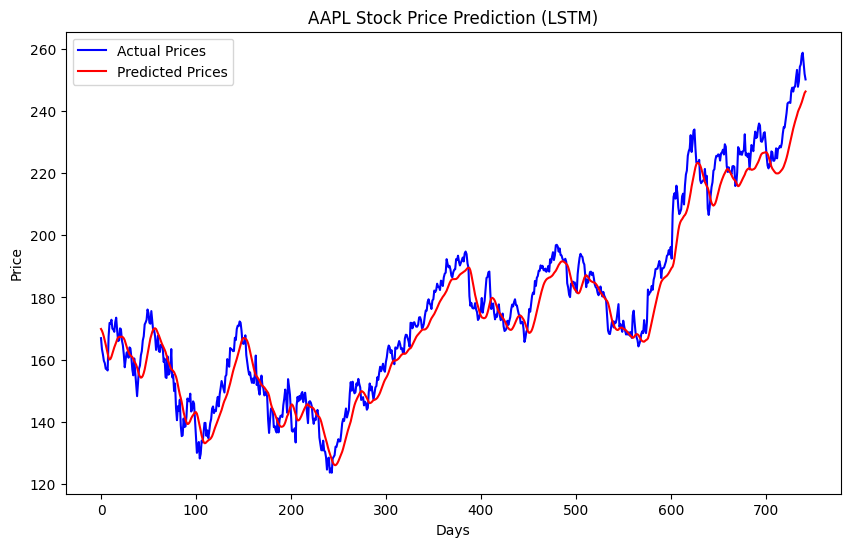

In [ ]:
#LSTM Algo
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Download Historical Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')
data = data[['Close']]  # Using closing price

# Step 2: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60  # Using 60 days of historical data
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
model.fit(X_train, y_train, batch_size=64, epochs=10)

# Step 6: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Evaluate Model Performance
mse = mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score (Accuracy): {r2 * 100:.2f}%')

# Step 8: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    3774 non-null   float64
 1   (High, AAPL)    3774 non-null   float64
 2   (Low, AAPL)     3774 non-null   float64
 3   (Close, AAPL)   3774 non-null   float64
 4   (Volume, AAPL)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None
Mean Squared Error (MSE): 3794.58461587492
R² Score (Accuracy): -327.87%


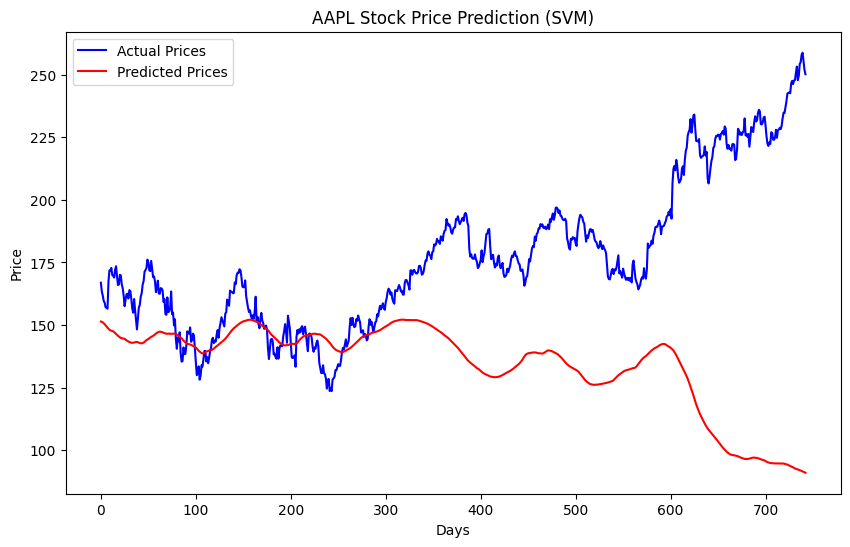

In [ ]:
#SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download Historical Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Display data info
print(data.info())

# Step 2: Data Preprocessing
# Separate scaler for Close price
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(data[['Close']])

# Scale all data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i].flatten())  # Flatten input
    y.append(scaled_close[i, 0])
X, y = np.array(X), np.array(y)

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build and Train SVM Model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = svm_model.predict(X_test)
predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Evaluate Model Performance
mse = mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score (Accuracy): {r2 * 100:.2f}%')

# Step 7: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction (SVM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    3774 non-null   float64
 1   (High, AAPL)    3774 non-null   float64
 2   (Low, AAPL)     3774 non-null   float64
 3   (Close, AAPL)   3774 non-null   float64
 4   (Volume, AAPL)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None
Mean Squared Error (MSE): 752.3224947772537
R² Score (Accuracy): 15.17%


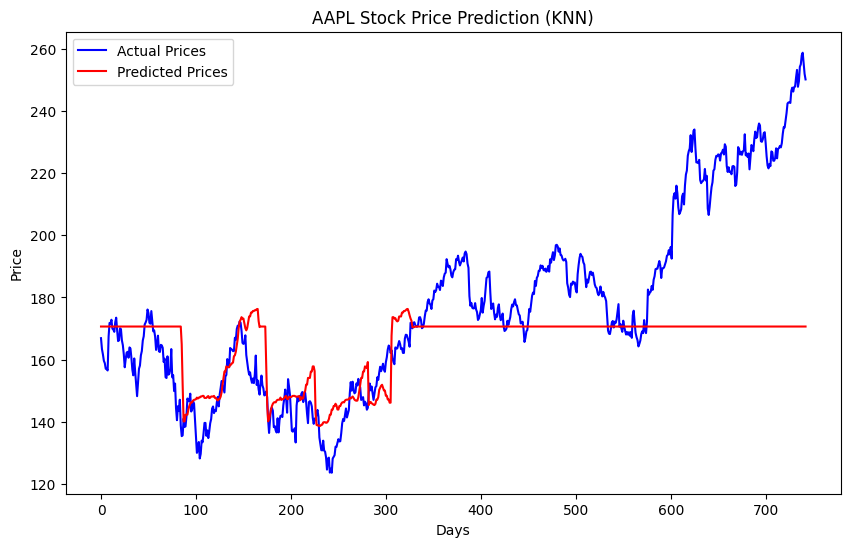

In [ ]:
#KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download Historical Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Display data info
print(data.info())

# Step 2: Data Preprocessing
# Separate scaler for Close price
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(data[['Close']])

# Scale all data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i].flatten())  # Flatten input
    y.append(scaled_close[i, 0])
X, y = np.array(X), np.array(y)

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build and Train KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = knn_model.predict(X_test)
predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Evaluate Model Performance
mse = mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score (Accuracy): {r2 * 100:.2f}%')

# Step 7: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction (KNN)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    3774 non-null   float64
 1   (High, AAPL)    3774 non-null   float64
 2   (Low, AAPL)     3774 non-null   float64
 3   (Close, AAPL)   3774 non-null   float64
 4   (Volume, AAPL)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None
Mean Squared Error (MSE): 640.9681320202907
R² Score (Accuracy): 27.73%


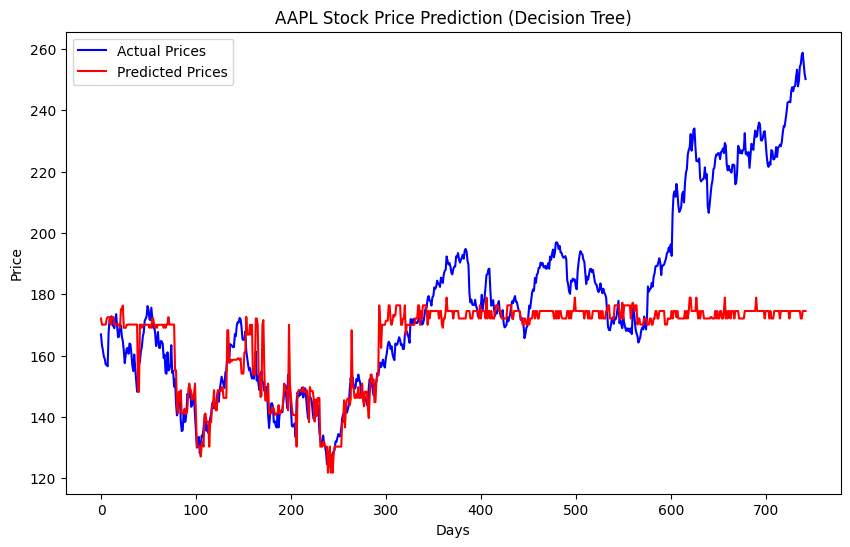

In [ ]:
#DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download Historical Stock Datax`x`
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2025-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Display data info
print(data.info())

# Step 2: Data Preprocessing
# Separate scaler for Close price
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(data[['Close']])

# Scale all data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i].flatten())  # Flatten input
    y.append(scaled_close[i, 0])
X, y = np.array(X), np.array(y)

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build and Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = dt_model.predict(X_test)
predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Evaluate Model Performance
mse = mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score (Accuracy): {r2 * 100:.2f}%')

# Step 7: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction (Decision Tree)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
